In [1]:
# some libraries that are used across examples
from pprint import pprint
import re
import time

# Web scraping

Why web scraping?

Many experts have proposed that 80% of a machine learning/AI project is spent on data gathering and preparation, with 20% spent on training a model. For more on this topic, watch Dr. Andrew Ng's presention on data centric AI availble at https://youtu.be/06-AZXmwHjo.

Data gathering is hard. If you can re-use data gathered by someone else, it can make your project possible. Note, reusing data collected for another purpose will still be hard and require quite a bit of data preparation.

**The best tool to use is the one you already know.**

Pandas has functionality that allows one to read in data from a variety of sources. Some include:

* comma separated value or tab separated value files
* databases (anything supported by SQLAlchemy)
* web pages (finds all HTML tables)

To learn more, see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html. Note this method doesn't support https and has a few other gotchas.


In [2]:
import pandas as pd

In [3]:
url = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/38/colorado-buffaloes'

In [4]:
dfs = pd.read_html(url)
print(len(dfs))

4


You may notice when looking at the web page that it looks like two stats tables, not 4.

In [5]:
for df in dfs:
    print(df.head())
    print('------------')

                   Name
0  McKinley Wright IV G
1        Jeriah Horne F
2         Evan Battey F
3    D'Shawn Schwartz G
4       Jabari Walker F
------------
   GP   MIN   PTS  REB  AST  STL  BLK   TO   FG%   FT%   3P%
0  32  32.5  15.2  4.3  5.7  1.1  0.3  2.1  48.0  84.4  30.1
1  32  24.5  10.8  5.8  0.9  0.6  0.1  1.1  45.6  90.6  39.7
2  32  25.7  10.1  5.3  1.0  0.4  0.3  1.6  49.8  82.5  11.8
3  30  28.0   9.3  4.1  1.3  0.5  0.1  1.5  41.0  73.1  40.0
4  26  14.2   7.6  4.3  0.5  0.5  0.5  1.1  52.6  77.8  52.3
------------
                   Name
0  McKinley Wright IV G
1        Jeriah Horne F
2         Evan Battey F
3    D'Shawn Schwartz G
4       Jabari Walker F
------------
      MIN  FGM  FGA  FTM  FTA  3PM  3PA  PTS  OR   DR  REB  AST  TO  STL  BLK
0  1041.0  178  371  103  122   28   93  487  27  112  139  182  68   34    9
1   784.0  123  270   48   53   52  131  346  36  151  187   29  35   19    2
2   821.0  108  217  104  126    2   17  322  61  107  168   31  51   13 

It appears that the player info is in a separate table from their stats. Let's combine the two.

In [6]:
stats_df = pd.concat([dfs[2], dfs[3]], axis=1)
stats_df

,Name,MIN,FGM,FGA,FTM,FTA,3PM,3PA,PTS,OR,DR,REB,AST,TO,STL,BLK
0,McKinley Wright IV G,1041.0,178,371,103,122,28,93,487,27,112,139,182,68,34,9
1,Jeriah Horne F,784.0,123,270,48,53,52,131,346,36,151,187,29,35,19,2
2,Evan Battey F,821.0,108,217,104,126,2,17,322,61,107,168,31,51,13,9
3,D'Shawn Schwartz G,839.0,98,239,38,52,46,115,280,30,92,122,38,45,15,4
4,Jabari Walker F,368.0,70,133,35,45,23,44,198,34,79,113,13,28,12,12
5,Dallas Walton F,387.0,55,100,49,58,9,19,168,21,52,73,13,23,12,17
6,Maddox Daniels G,585.0,59,155,13,15,38,103,169,14,62,76,32,16,15,2
7,Eli Parquet G,867.0,59,124,21,23,23,55,162,15,49,64,40,31,26,23
8,Keeshawn Barthelemy G,345.0,42,119,11,12,17,56,112,7,16,23,42,22,7,6
9,Tristan da Silva F,222.0,27,51,7,12,4,15,65,8,17,25,8,15,8,2


In [7]:
# url = 'https://cubuffs.com/sports/mens-basketball/stats/2019-20'
url = 'https://en.wikipedia.org/wiki/Colorado_Buffaloes_men%27s_basketball'

In [8]:
dfs = pd.read_html(url)
print(len(dfs))

25


Compare https://en.wikipedia.org/wiki/Colorado_Buffaloes_men%27s_basketball#NCAA_Tournament_results to this

In [9]:
dfs[18]

,Year,Seed,Round,Opponent,Result/Score
0,1940,NaN,Elite EightRegional 3rd Place,USCRice,L 32–38L 56–60 OT
1,1942,NaN,Elite EightFinal Four,KansasStanford,W 46–44L 35–46
2,1946,NaN,Elite EightRegional 3rd Place,CaliforniaBaylor,L 44-50W 59–44
3,1954,NaN,Sweet SixteenRegional 3rd Place,BradleyRice,L 64–76L 55–78
4,1955,NaN,Sweet SixteenElite EightFinal FourNational 3rd...,TulsaBradleySan FranciscoIowa,W 69–59W 93–81L 50–62W 75–54
5,1962,NaN,Sweet SixteenElite Eight,Texas TechCincinnati,W 67–60L 46–73
6,1963,NaN,Sweet SixteenElite Eight,Oklahoma CityCincinnati,W 78–72L 60–67
7,1969,NaN,Sweet SixteenRegional 3rd Place,Colorado StateTexas A&M,L 56–64W 97–82
8,1997,9 E,Round of 64Round of 32,(8) Indiana(1) #4 North Carolina,W 80–62L 56–73
9,2003,10 S,Round of 64,(7) Michigan State,L 64–79


Also note, that Pandas can create HTML - so you can use Python to create a table for a web page.

In [10]:
dfs[18].to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Year</th>\n      <th>Seed</th>\n      <th>Round</th>\n      <th>Opponent</th>\n      <th>Result/Score</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1940</td>\n      <td>NaN</td>\n      <td>Elite EightRegional 3rd Place</td>\n      <td>USCRice</td>\n      <td>L 32–38L 56–60 OT</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1942</td>\n      <td>NaN</td>\n      <td>Elite EightFinal Four</td>\n      <td>KansasStanford</td>\n      <td>W 46–44L 35–46</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>1946</td>\n      <td>NaN</td>\n      <td>Elite EightRegional 3rd Place</td>\n      <td>CaliforniaBaylor</td>\n      <td>L 44-50W 59–44</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>1954</td>\n      <td>NaN</td>\n      <td>Sweet SixteenRegional 3rd Place</td>\n      <td>BradleyRice</td>\n      <td>L 64–76L 55–78</td>\n    </tr>\n   

# More web Scraping

In [11]:
import re

In [12]:
url = 'https://www.time.gov/'

## Web scraping using Requests-HTML

In [13]:
from requests_html import HTMLSession

In [14]:
session = HTMLSession()
r = session.get(url)

In [15]:
page_html = r.html.raw_html.decode('utf-8')

In [16]:
html_body = re.search(r'<body>.+</body>', page_html, flags=re.DOTALL)[0]
lines = re.findall(r'.+', html_body)
for n in range(20):
    print(lines[n])

<body>
	
		<header>
			
			<!-- TOP GREY BAR -->
			<div id="top-grey">
				<div class="inner">
					<img src="img/us_flag_small.png" class="left gap" alt="U.S. Flag"><span class="left gap">An official website of the United States government</span> <div id="info-btn"><a href="#" onclick="info_exp('top-grey-exp', 'arrow');">info <span id="arrow" aria-expanded="false"></span></a></div>
				</div>
			</div>
			
			<!-- EXPANDED TOP GREY BAR -->
			 <div id="top-grey-exp" style="display:none;">
				<div class="inner">
					<div class="col-50">
						<div class="pad-4">
							<img src="img/icon-dot-gov.svg" alt="icon dot gov" class="img10"><br>
							<strong>The .gov means it’s official.</strong>
							<p class="no-marg">Federal government websites often end in .gov or .mil. Before sharing sensitive information, make sure you’re on a federal government site.</p>
						</div>	


In [17]:
r.html.find('time')

[<Element 'time' zoneoffset='9'>,
 <Element 'time' zoneoffset='10'>,
 <Element 'time' zoneoffset='10'>,
 <Element 'time' zoneoffset='11'>,
 <Element 'time' zoneoffset='-10'>,
 <Element 'time' zoneoffset='4'>,
 <Element 'time' zoneoffset='8'>,
 <Element 'time' zoneoffset='7'>,
 <Element 'time' zoneoffset='6'>,
 <Element 'time' zoneoffset='5'>,
 <Element 'time' zoneoffset='7'>,
 <Element 'time' id='timeUTC'>,
 <Element 'time' zoneoffset='4'>]

In [18]:
for t in r.html.find('time'):
    if 'id' in t.attrs.keys():
        print(f'UTC Time is: {t.text}')

UTC Time is: 


## Web scraping using Selenium and a web browser

For documentation on Selenium, see:

* https://selenium-python.readthedocs.io/index.html
* https://www.selenium.dev/documentation/en/

For a introductory tutorial, see https://www.scrapingbee.com/blog/selenium-python/

Selenium requires additional webdriver software that allows you to control Chrome, Firefox, etc. via Python.

On macOS, you can use `brew` (https://brew.sh/) to install the dependencies:

```bash
brew install geckodriver
brew install chromedriver
```

On Windows 10, you can use `choco` (https://chocolatey.org/) to install the dependencies (Run this in an Administrator shell):

```powershell
# use this line to install firefox version
choco install selenium-gecko-driver
# use this line to install chrome version
choco install chromedriver
```

In [19]:
from selenium import webdriver
from IPython.display import Image
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait

In [20]:
from selenium.webdriver.firefox.options import Options as firefoxoptions
options = firefoxoptions()
# comment out this line to see what's happening
options.headless = True
driver = webdriver.Firefox(options=options)
driver.set_window_size(1024,768)
driver.get(url)
driver.save_screenshot('firefox.png')

True

In [21]:
pprint(driver.capabilities)

{'acceptInsecureCerts': True,
 'browserName': 'firefox',
 'browserVersion': '87.0',
 'moz:accessibilityChecks': False,
 'moz:buildID': '20210318103112',
 'moz:geckodriverVersion': '0.29.1',
 'moz:headless': True,
 'moz:processID': 40354,
 'moz:profile': '/var/folders/bd/jdbrc8bn29g0gzz86l5bp4040000gr/T/rust_mozprofileDS57N0',
 'moz:shutdownTimeout': 60000,
 'moz:useNonSpecCompliantPointerOrigin': False,
 'moz:webdriverClick': True,
 'pageLoadStrategy': 'normal',
 'platformName': 'mac',
 'platformVersion': '18.7.0',
 'rotatable': False,
 'setWindowRect': True,
 'strictFileInteractability': False,
 'timeouts': {'implicit': 0, 'pageLoad': 300000, 'script': 30000},
 'unhandledPromptBehavior': 'dismiss and notify'}


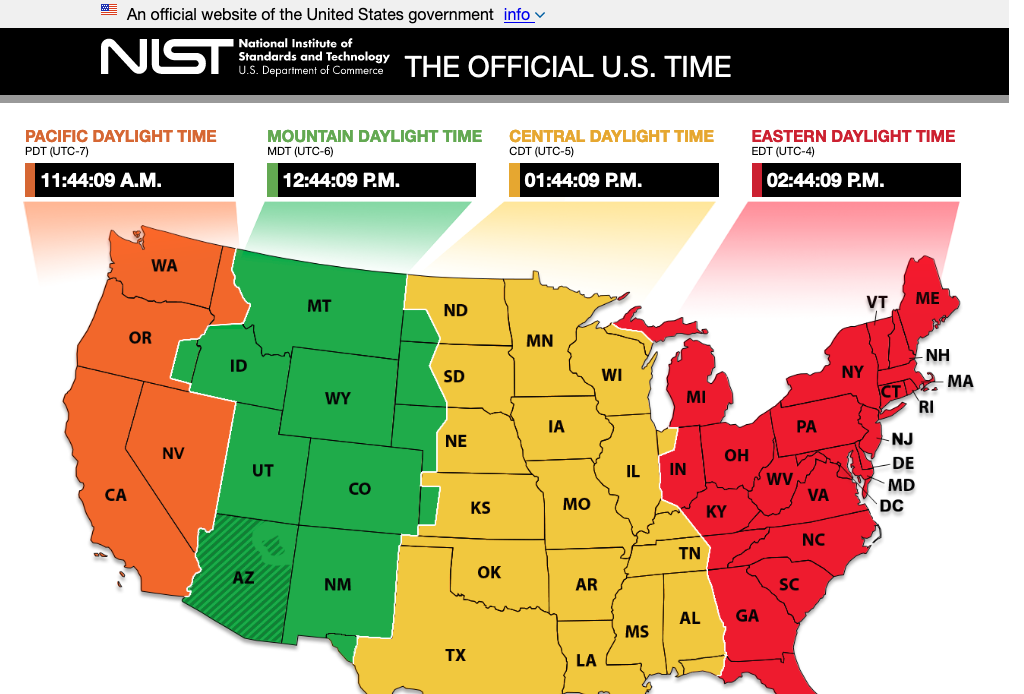

In [22]:
Image(filename='firefox.png')

Alternatively use Chrome
```python
from selenium.webdriver.chrome.options import Options as chromeoptions
options = chromeoptions()
options.headless = True
driver = webdriver.Chrome(options=options)
driver.set_window_size(640,480)
driver.get(url)
driver.save_screenshot('chrome.png')
Image(filename='chrome.png')
```

In [23]:
page_html = driver.page_source

html_body = re.search(r'<body>.+</body>', page_html, flags=re.DOTALL)[0]
lines = re.findall(r'.+', html_body)
for n in range(20):
    print(lines[n])

<body>
	
		<header>
			
			<!-- TOP GREY BAR -->
			<div id="top-grey">
				<div class="inner">
					<img src="img/us_flag_small.png" class="left gap" alt="U.S. Flag"><span class="left gap">An official website of the United States government</span> <div id="info-btn"><a href="#" onclick="info_exp('top-grey-exp', 'arrow');">info <span id="arrow" aria-expanded="false"></span></a></div>
				</div>
			</div>
			
			<!-- EXPANDED TOP GREY BAR -->
			 <div id="top-grey-exp" style="display:none;">
				<div class="inner">
					<div class="col-50">
						<div class="pad-4">
							<img src="img/icon-dot-gov.svg" alt="icon dot gov" class="img10"><br>
							<strong>The .gov means it’s official.</strong>
							<p class="no-marg">Federal government websites often end in .gov or .mil. Before sharing sensitive information, make sure you’re on a federal government site.</p>
						</div>	


In [24]:
driver.find_elements_by_tag_name('time')

[<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="8dd70505-0423-7640-b1cc-340222dd8071", element="02feeb33-7964-774d-9770-5f69d2a70e04")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="8dd70505-0423-7640-b1cc-340222dd8071", element="d44f5627-b0b8-8c44-bb81-64afc26b97d3")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="8dd70505-0423-7640-b1cc-340222dd8071", element="202ab75b-8f13-ac45-89b8-a4b8267477f3")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="8dd70505-0423-7640-b1cc-340222dd8071", element="e6eb3918-dd65-1e4a-bb58-3f2c09625d26")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="8dd70505-0423-7640-b1cc-340222dd8071", element="487e41aa-2230-c942-a93b-94647eea252a")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="8dd70505-0423-7640-b1cc-340222dd8071", element="acc6f645-7b81-4a49-902b-6c4ed73b05fe")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement 

In [25]:
for t in driver.find_elements_by_tag_name('time'):
    if t.get_attribute('id') is not '':
        print(t.text)

18:44:09


### A slightly more advanced example

Similar to web development, using Selenium for web scraping requires knowledge of HTML, CSS, and Javascript. One important skill to have is how to select elements from the document object model. There are various ways of identifying or selecting desired elements. Here are some references to learn more:

* [The 30 CSS Selectors You Must Memorize](https://code.tutsplus.com/tutorials/the-30-css-selectors-you-must-memorize--net-16048)
* [CSS Selector Reference](https://www.w3schools.com/cssref/css_selectors.asp)

In [26]:
driver.get('https://www.amazon.com')

In [27]:
search_box = driver.find_element_by_id('twotabsearchtextbox')
search_box.clear()
search_box.send_keys('512GB sd card\n')
search_box.submit()

Due to needing time for browser to load and render all content, if you run this next cell immediately after the previous one, it may fail.

There are a few options to solve this issue:

* Put in an explicit wait via `time.sleep()` call to help prevent problems.
* Configure the driver to wait if an element found doesn't exist via `driver.implicitly_wait(n)`. In my experience with the Gecko driver, this can fail when chaining operations such as `li.find_element_by_class_name('a-link-normal').click()`
* Depending on what is needed on a page, wait for that explicitly via `WebDriverWait(driver, n)`

See https://selenium-python.readthedocs.io/waits.html for more information.

In [28]:
# Tell selenium to wait up to 5 seconds for desired elements to exist
driver.implicitly_wait(5)

In [33]:
# implicity_wait works here
dropdown = driver.find_element_by_class_name('a-dropdown-container')
dropdown.click()

In [34]:
# sort by 'Price: Low to High'
# implicity_wait often fails here
# time.sleep(2)
driver.find_element_by_id('s-result-sort-select_1').click()

In [ ]:
# despite search terms, some small SDCards are shown
# click on the filter link on the left
li = driver.find_element_by_id('p_n_feature_two_browse-bin/13203835011')
li_class = li.find_element_by_class_name('a-link-normal')
li_class.click()

In [ ]:
product_desc = []
product_price = []

products = driver.find_elements_by_css_selector('.sg-col.sg-col-4-of-12.sg-col-8-of-16.sg-col-12-of-20')
for p in products:
    product_desc.append(
        # product names/descriptions can be very long. just get first 50 characterss
        p.find_element_by_css_selector('.a-size-medium.a-color-base.a-text-normal').text[:50]
    )
    
    dollars = p.find_elements_by_class_name('a-price-whole')
    price = None
    if len(dollars) > 0:
        price = float(dollars[0].text)
    cents = p.find_elements_by_class_name('a-price-fraction')
    if len(cents) > 0:
        price = price + float('0.' + cents[0].text)
    product_price.append(price)

In order to build a dataframe from this information, both lists must be the same lenght. Check to make sure first

In [ ]:
len(product_desc)

In [ ]:
len(product_price)

In [ ]:
pd.DataFrame({'product':product_desc,
              'price':product_price
              })

### Cleaning up

When finished, make sure you close the browser. Can either `driver.quit()` or `driver.close()`. `.close()` will close open tabs. If you close the last tab, it is the same as calling `.quit()`

In [ ]:
driver.quit()

In [ ]:
try:
    driver.close()
except Exception:
    print('Already closed')